In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#Ignore Future Warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [181]:
dataset = pd.read_csv("/Users/meghnatiwari/Desktop/255 Group Project/dataset.csv")
dataset.shape

(2225, 2)

In [182]:
dataset.head()

,category,news
0,business,Ad sales boost Time Warner profit\n\nQuarterly...
1,business,Dollar gains on Greenspan speech\n\nThe dollar...
2,business,Yukos unit buyer faces loan claim\n\nThe owner...
3,business,High fuel prices hit BA's profits\n\nBritish A...
4,business,Pernod takeover talk lifts Domecq\n\nShares in...


In [183]:
dataset['category_id'] = dataset.category.factorize()[0]
dataset.head()

,category,news,category_id
0,business,Ad sales boost Time Warner profit\n\nQuarterly...,0
1,business,Dollar gains on Greenspan speech\n\nThe dollar...,0
2,business,Yukos unit buyer faces loan claim\n\nThe owner...,0
3,business,High fuel prices hit BA's profits\n\nBritish A...,0
4,business,Pernod takeover talk lifts Domecq\n\nShares in...,0


In [184]:
print(dataset['category'].value_counts())

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64


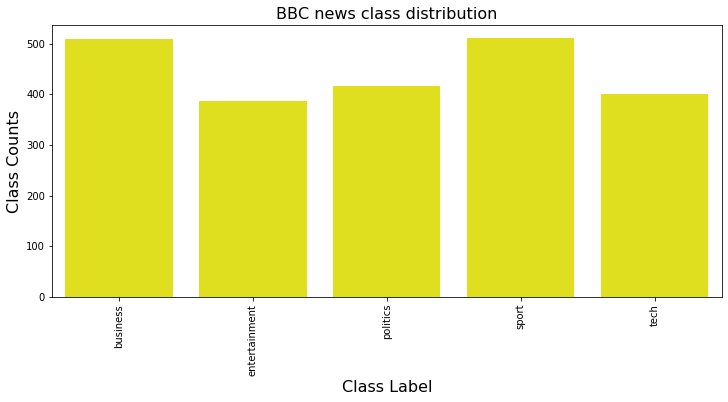

In [185]:
plt.figure(figsize=(12,5))
sns.countplot(x=dataset.category, color='yellow')
plt.title('BBC news class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

In [186]:
# Converting the catergory labels into numeric values using Encoder
labelEncoder = preprocessing.LabelEncoder()
dataset['category_id'] = labelEncoder.fit_transform(dataset['category'])
print(dataset['category_id'].value_counts())

3    511
0    510
2    417
4    401
1    386
Name: category_id, dtype: int64


In [187]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.remove_stopwords ,
           gsp.strip_short,
           gsp.stem_text
          ]

def clean_text(dataset):
    dataset = dataset.lower()
    dataset = utils.to_unicode(dataset)
    for f in filters:
        dataset = f(dataset)
    return dataset

In [188]:
dataset["clean_text"] = dataset["news"].apply(clean_text)
dataset.head()

,category,news,category_id,clean_text
0,business,Ad sales boost Time Warner profit\n\nQuarterly...,0,sale boost time warner profit quarterli profit...
1,business,Dollar gains on Greenspan speech\n\nThe dollar...,0,dollar gain greenspan speech dollar hit highes...
2,business,Yukos unit buyer faces loan claim\n\nThe owner...,0,yuko unit buyer face loan claim owner embattl ...
3,business,High fuel prices hit BA's profits\n\nBritish A...,0,high fuel price hit profit british airwai blam...
4,business,Pernod takeover talk lifts Domecq\n\nShares in...,0,pernod takeov talk lift domecq share drink foo...


In [189]:
dataset.iloc[2,1]

'Yukos unit buyer faces loan claim\n\nThe owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay back a $900m (Â£479m) loan.\n\nState-owned Rosneft bought the Yugansk unit for $9.3bn in a sale forced by Russia to part settle a $27.5bn tax claim against Yukos. Yukos\' owner Menatep Group says it will ask Rosneft to repay a loan that Yugansk had secured on its assets. Rosneft already faces a similar $540m repayment demand from foreign banks. Legal experts said Rosneft\'s purchase of Yugansk would include such obligations. "The pledged assets are with Rosneft, so it will have to pay real money to the creditors to avoid seizure of Yugansk assets," said Moscow-based US lawyer Jamie Firestone, who is not connected to the case. Menatep Group\'s managing director Tim Osborne told the Reuters news agency: "If they default, we will fight them where the rule of law exists under the international arbitration clauses of the credit."\n\nRosneft official

In [190]:
clean_text(dataset.iloc[2,1])

'yuko unit buyer face loan claim owner embattl russian oil giant yuko ask buyer product unit pai 900m â£479m loan state own rosneft bought yugansk unit 3bn sale forc russia settl 5bn tax claim yuko yuko owner menatep group sai ask rosneft repai loan yugansk secur asset rosneft face similar 540m repay demand foreign bank legal expert said rosneft purchas yugansk includ oblig pledg asset rosneft pai real monei creditor avoid seizur yugansk asset said moscow base lawyer jami fireston connect case menatep group manag director tim osborn told reuter new agenc default fight rule law exist intern arbitr claus credit rosneft offici unavail comment compani said intend action menatep recov tax claim debt ow yugansk yuko file bankruptci protect court attempt prevent forc sale main product arm sale went ahead decemb yugansk sold littl known shell compani turn bought rosneft yuko claim downfal punish polit ambit founder mikhail khodorkovski vow sue particip sale'

In [191]:
# Splitting the dataset into Training and Testing Data
train_text, test_text, train_labels, test_labels = train_test_split(dataset["clean_text"], dataset["category_id"], train_size=0.7, random_state=5)

print("Train x size :", train_text.shape)
print("Train y size :", train_labels.shape)
print("Test x size :", test_text.shape)
print("Test y size :", test_labels.shape)

Train x size : (1557,)
Train y size : (1557,)
Test x size : (668,)
Test y size : (668,)


In [194]:
# Extracting features by counting word counts
countVector = CountVectorizer(min_df=2)
countVector.fit_transform(train_text)
trainFeatureSet = countVector.transform(train_text)
testFeatureSet = countVector.transform(test_text)

In [195]:
testFeatureSet.shape

(668, 9915)

In [196]:
#Logistic Regression Model for training Data using s
logRegModel = LogisticRegression()
logRegModel.fit(trainFeatureSet,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [200]:
# Finding the predictions of text dataset
predLogReg1 = logRegModel.predict(testFeatureSet)
score = logRegModel.score(testFeatureSet,test_labels)
print("Approximate Accuracy with countVectorizer : ", score*100)

Approximate Accuracy with countVectorizer :  97.30538922155688


In [219]:
# Extracting Features with TdIdf
tfIdVector = TfidfVectorizer(min_df=6,norm='l2',smooth_idf=True,use_idf=True)

#Extracting train and test features
tfidTrainFeatures = tfIdVector.fit_transform(train_text)
tfidTestFeatures = tfIdVector.transform(test_text)

In [220]:
#Logistic Regression Model for training Data with tfid features
logRegModel2 = LogisticRegression()
logRegModel2.fit(tfidTrainFeatures,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [221]:
# Finding the predictions of text dataset
predLogReg2 = logRegModel2.predict(tfidTestFeatures)
score2 = logRegModel2.score(tfidTestFeatures,test_labels)
print("Approximate Accuracy with TfIdf : ", score2*100)

Approximate Accuracy with TfIdf :  96.55688622754491
